# Lecture 10: Gibbs distribution for a single spin in an external magnetic field

The energy of a particle with magnetic moment $\mathbf{\mu}$ in a magnetic field $\mathbf{B}$ is given by

$$ E = -\mathbf{\mu}\cdot \mathbf{B}\,.$$

Let's consider a statistical model of a particle in an external magnetic field. To keep things simple, we'll assume that the magnetic field is oriented in a fixed direction, and that the magnetic moment of the particle can be either aligned or anti-aligned with the magnetic field. In statistical physics models, these particles are often called **spins**.

Mathematically, we could describe the orientation of the spin with a variable $\sigma \in \{-1, 1\}$. Let's assume that the magnetic field is oriented in the positive direction. The energy of the spin is then

$$ E(\sigma) = -\epsilon \sigma\,, $$

where $\epsilon = \mu B$. If we maintain the system with the spin at a constant temperature $T$, then the Gibbs distribution for the spin states $\sigma$ is

$$ P(\sigma) = \frac{e^{-E(\sigma)/T}}{Z} \,.$$

Here we've chosen units such that Boltzmann's constant $k_B=1$.

### Example: Coding the Gibbs distribution

Now let's write a function that returns $P(\sigma)$.

In [1]:
import numpy as np
import numpy.random as rng
import seaborn as sns
import matplotlib.pyplot as plt


def gibbs(eps, T):
    """ This function takes the energy eps and temperature T as input
        and returns the Gibbs distribution for a single spin as output """
    
    Z     = np.exp(-eps/T) + np.exp(eps/T)
    p_pos = np.exp( eps/T) / Z
    p_neg = np.exp(-eps/T) / Z
    
    return p_pos, p_neg

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The magnetization is the average direction of the spin, given by

$$ m = \left\langle \sigma \right\rangle = \sum_{\sigma\in\{\pm 1\}} \sigma \frac{e^{\epsilon \sigma/T}}{Z} \,. $$ 

Let's use the Gibbs distribution above to compute the magnetization when $\epsilon=1$ and $T=1$.

In [2]:
p_pos, p_neg = gibbs(1, 1)

m = 1 * p_pos + (-1 * p_neg)

print('The magnetization is %lf' % m)

The magnetization is 0.761594


And now, let's explore the dependence of the magnetization on the strength and direction of the external magnetic field $\mathbf{B}$. Because $\epsilon$ is directly proportional to $\mathbf{B}$, we can explore this behavior by manipulating $\epsilon$ directly. For this demonstration we'll set $T=1$.

*Aside*: In this simple case we can analytically write down the magnetization as a simple hyperbolic function.

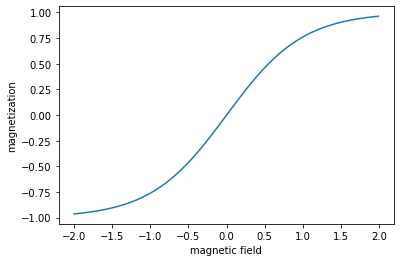

In [3]:
eps_values = np.arange(-2, 2, 0.01)
m_values   = []

for eps in eps_values:
    p_pos, p_neg = gibbs(eps, 1)
    m_values.append( p_pos - p_neg )
    
sns.lineplot(eps_values, m_values)
plt.xlabel('magnetic field')
plt.ylabel('magnetization');

**Exercise**: Explore the behavior of the magnetization as a function of the temperature when the strength of the magnetic field is fixed such that $\epsilon = 1$. What do you expect to observe? 

**Note**: You might want to use a logarithmic scale for the temperature range. You can do this with the `logspace` function from `numpy`. Calling `np.logspace(start, end, num)` will return an array of `num` numbers from $10^{\rm{start}}$ to $10^{\rm{end}}$ that are evenly spaced on a log scale.

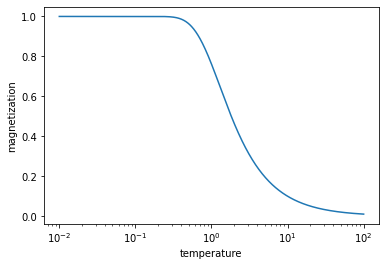

In [5]:
import numpy as np

eps      = 1
T_values = np.logspace(-2, 2, 1000)
m_values = []

# Loop through the T values to fill in magnetizations!
for T in T_values:
  p_pos, p_neg = gibbs(eps, T)
  m_values.append(p_pos - p_neg)
    
sns.lineplot(T_values, m_values)
plt.xscale('log')
plt.xlabel('temperature')
plt.ylabel('magnetization');

In [4]:
help(np.logspace)

Help on function logspace in module numpy:

logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None, axis=0)
    Return numbers spaced evenly on a log scale.
    
    In linear space, the sequence starts at ``base ** start``
    (`base` to the power of `start`) and ends with ``base ** stop``
    (see `endpoint` below).
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    Parameters
    ----------
    start : array_like
        ``base ** start`` is the starting value of the sequence.
    stop : array_like
        ``base ** stop`` is the final value of the sequence, unless `endpoint`
        is False.  In that case, ``num + 1`` values are spaced over the
        interval in log-space, of which all but the last (a sequence of
        length `num`) are returned.
    num : integer, optional
        Number of samples to generate.  Default is 50.
    endpoint : boolean, optional
        If true, `stop` is the last sample. Otherwise, 